#Machine Learning Models
1. Naive Bayes
2. Support Vector Machines
3. Logistic Regression
4. Random Forest
5. Ada Boost
6. XG Boost


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn import model_selection, naive_bayes, svm, metrics, preprocessing, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import decomposition, ensemble

from keras.preprocessing.sequence import pad_sequences


df = pd.read_csv('/content/drive/My Drive/ML_Data/Sentiment.csv')
df.drop(['id', 'relevant_yn', 'relevant_yn_confidence', 'candidate', 'candidate_confidence', 'sentiment_confidence', 'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name','relevant_yn_gold','retweet_count', 'sentiment_gold',	'subject_matter_gold', 'tweet_coord', 'tweet_created', 'tweet_id',	'tweet_location',	'user_timezone'], axis=1, inplace=True)



def clean_data(sentence):
  sentence = [w for w in sentence.split(" ") if "RT" not in w]
  sentence = [w for w in sentence if ":" not in w]
  sentence = [w for w in sentence if "#" not in w]
  sentence = [w for w in sentence if "@" not in w]
  sentence = " ".join(sentence)
  return sentence

df["text"] = df["text"].apply(lambda x: clean_data(x))

x = df.text
y = df.sentiment

label = preprocessing.LabelEncoder()

y = label.fit_transform(y)


In [ ]:
# Encoding the input text

count_label = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')

x_count = count_label.fit_transform(x)


tfidf_word_label = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)

x_tfidf_word = tfidf_word_label.fit_transform(x)


tfidf_ngram_word_label = TfidfVectorizer(analyzer='word', ngram_range=(2, 3), token_pattern=r'\w{1,}', max_features=5000)

x_ngram_tfidf_word = tfidf_ngram_word_label.fit_transform(x)


tfidf_char_label = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', max_features=5000)

x_tfidf_char = tfidf_char_label.fit_transform(x)


tfidf_ngram_char_label = TfidfVectorizer(analyzer='char', ngram_range=(2, 3), token_pattern=r'\w{1,}', max_features=5000)

x_ngram_tfidf_char = tfidf_ngram_char_label.fit_transform(x)


In [ ]:
x_train_count, x_test_count, y_train, y_test = train_test_split(x_count, y, test_size=0.2, random_state=42)
x_train_tfidf_word, x_test_tfidf_word, y_train, y_test = train_test_split(x_tfidf_word, y, test_size=0.2, random_state=42)
x_train_ngram_tfidf_word, x_test_ngram_tfidf_word, y_train, y_test = train_test_split(x_ngram_tfidf_word, y, test_size=0.2, random_state=42)
x_train_tfidf_char,  x_test_tfidf_char, y_train, y_test = train_test_split(x_tfidf_char, y, test_size=0.2, random_state=42)
x_train_ngram_tfidf_char,  x_test_ngram_tfidf_char, y_train, y_test = train_test_split(x_ngram_tfidf_char, y, test_size=0.2, random_state=42)

In [ ]:
def model_training(model, x_train, y_train, x_test, y_test):

  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = metrics.accuracy_score(y_pred, y_test)

  return accuracy

In [ ]:
accuracyAnalysis = {}
accuracy = model_training(naive_bayes.MultinomialNB(), x_train_count, y_train, x_test_count, y_test)
print("NB countVectorizer: ", accuracy)
accuracyAnalysis["NB countVectorizer"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("NB Tfidf word: ", accuracy)
accuracyAnalysis["NB Tfidf word"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("NB ngram countVectorizer: ", accuracy)
accuracyAnalysis["NB ngram countVectorizer"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("NB Tfidf char: ", accuracy)
accuracyAnalysis["NB Tfidf char"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("NB ngram Tfidf char: ", accuracy)
accuracyAnalysis["NB ngram Tfidf char"] = accuracy

NB countVectorizer:  0.6396396396396397
NB Tfidf word:  0.6590990990990991
NB ngram countVectorizer:  0.652972972972973
NB Tfidf char:  0.623063063063063
NB ngram Tfidf char:  0.6443243243243243


In [ ]:
accuracy = model_training(svm.SVC(), x_train_count, y_train, x_test_count, y_test)
print("SVM countVectorizer: ", accuracy)
accuracyAnalysis["SVM countVectorizer"] = accuracy

accuracy = model_training(svm.SVC(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("SVM Tfidf word: ", accuracy)
accuracyAnalysis["SVM Tfidf word"] = accuracy

accuracy = model_training(svm.SVC(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("SVM ngram countVectorizer: ", accuracy)
accuracyAnalysis["SVM ngram countVectorizer"] = accuracy

accuracy = model_training(svm.SVC(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("SVM Tfidf char: ", accuracy)
accuracyAnalysis["SVM Tfidf char"] = accuracy

accuracy = model_training(svm.SVC(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("SVM ngram Tfidf char: ", accuracy)
accuracyAnalysis["SVM ngram Tfidf char"] = accuracy

SVM countVectorizer:  0.6785585585585585
SVM Tfidf word:  0.6958558558558559
SVM ngram countVectorizer:  0.6666666666666666
SVM Tfidf char:  0.6374774774774775
SVM ngram Tfidf char:  0.6796396396396397


In [ ]:
accuracy = model_training(linear_model.LogisticRegression(), x_train_count, y_train, x_test_count, y_test)
print("LR countVectorizer: ", accuracy)
accuracyAnalysis["LR countVectorizer"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("LR Tfidf word: ", accuracy)
accuracyAnalysis["LR Tfidf word"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("LR ngram countVectorizer: ", accuracy)
accuracyAnalysis["LR ngram countVectorizer"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("LR Tfidf char: ", accuracy)
accuracyAnalysis["LR Tfidf char"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("LR ngram Tfidf char: ", accuracy)
accuracyAnalysis["LR ngram Tfidf char"] = accuracy

LR countVectorizer:  0.6753153153153153
LR Tfidf word:  0.6861261261261261
LR ngram countVectorizer:  0.6554954954954955
LR Tfidf char:  0.6295495495495496
LR ngram Tfidf char:  0.6763963963963964


In [ ]:
accuracy = model_training(ensemble.RandomForestClassifier(), x_train_count, y_train, x_test_count, y_test)
print("RF countVectorizer: ", accuracy)
accuracyAnalysis["RF countVectorizer"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("RF Tfidf word: ", accuracy)
accuracyAnalysis["RF Tfidf word"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("RF ngram countVectorizer: ", accuracy)
accuracyAnalysis["RF ngram countVectorizer"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("RF Tfidf char: ", accuracy)
accuracyAnalysis["RF Tfidf char"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("RF ngram Tfidf char: ", accuracy)
accuracyAnalysis["RF ngram Tfidf char"] = accuracy

RF countVectorizer:  0.6771171171171171
RF Tfidf word:  0.6771171171171171
RF ngram countVectorizer:  0.6464864864864864
RF Tfidf char:  0.6623423423423423
RF ngram Tfidf char:  0.670990990990991


In [ ]:
accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_count, y_train, x_test_count, y_test)
print("AB countVectorizer: ", accuracy)
accuracyAnalysis["AB countVectorizer"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("AB Tfidf word: ", accuracy)
accuracyAnalysis["AB Tfidf word"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("AB ngram countVectorizer: ", accuracy)
accuracyAnalysis["AB ngram countVectorizer"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("AB Tfidf char: ", accuracy)
accuracyAnalysis["AB Tfidf char"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("AB ngram Tfidf char: ", accuracy)
accuracyAnalysis["AB ngram Tfidf char"] = accuracy

AB countVectorizer:  0.649009009009009
AB Tfidf word:  0.6418018018018018
AB ngram countVectorizer:  0.6295495495495496
AB Tfidf char:  0.6335135135135135
AB ngram Tfidf char:  0.6335135135135135


In [ ]:
accuracy = model_training(xgboost.XGBClassifier(), x_train_count, y_train, x_test_count, y_test)
print("XGB countVectorizer: ", accuracy)
accuracyAnalysis["XGB countVectorizer"] = accuracy

accuracy = model_training(xgboost.XGBClassifier(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("XGB Tfidf word: ", accuracy)
accuracyAnalysis["XGB Tfidf word"] = accuracy

accuracy = model_training(xgboost.XGBClassifier(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("XGB ngram countVectorizer: ", accuracy)
accuracyAnalysis["XGB ngram countVectorizer"] = accuracy

accuracy = model_training(xgboost.XGBClassifier(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("XGB Tfidf char: ", accuracy)
accuracyAnalysis["XGB Tfidf char"] = accuracy

accuracy = model_training(xgboost.XGBClassifier(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("XGB ngram Tfidf char: ", accuracy)
accuracyAnalysis["XGB ngram Tfidf char"] = accuracy

XGB countVectorizer:  0.6421621621621622
XGB Tfidf word:  0.6526126126126126
XGB ngram countVectorizer:  0.6414414414414414
XGB Tfidf char:  0.645045045045045
XGB ngram Tfidf char:  0.6645045045045045


In [ ]:
metrics = sorted(accuracyAnalysis.items(), key=lambda x: x[1], reverse=True)
metrics

[('SVM Tfidf word', 0.6958558558558559),
 ('LR Tfidf word', 0.6861261261261261),
 ('SVM ngram Tfidf char', 0.6796396396396397),
 ('SVM countVectorizer', 0.6785585585585585),
 ('RF countVectorizer', 0.6771171171171171),
 ('RF Tfidf word', 0.6771171171171171),
 ('LR ngram Tfidf char', 0.6763963963963964),
 ('LR countVectorizer', 0.6753153153153153),
 ('RF ngram Tfidf char', 0.670990990990991),
 ('SVM ngram countVectorizer', 0.6666666666666666),
 ('XGB ngram Tfidf char', 0.6645045045045045),
 ('RF Tfidf char', 0.6623423423423423),
 ('NB Tfidf word', 0.6590990990990991),
 ('LR ngram countVectorizer', 0.6554954954954955),
 ('NB ngram countVectorizer', 0.652972972972973),
 ('XGB Tfidf word', 0.6526126126126126),
 ('AB countVectorizer', 0.649009009009009),
 ('RF ngram countVectorizer', 0.6464864864864864),
 ('XGB Tfidf char', 0.645045045045045),
 ('NB ngram Tfidf char', 0.6443243243243243),
 ('XGB countVectorizer', 0.6421621621621622),
 ('AB Tfidf word', 0.6418018018018018),
 ('XGB ngram coun

/bin/bash: matplotlib: command not found


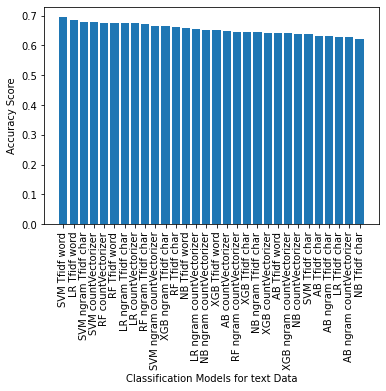

In [ ]:
import matplotlib.pyplot as plt
!matplotlib inline

x_metrics = []
y_metrics = []

for i in metrics:
  x_metrics.append(i[0])
  y_metrics.append(i[1])


plt.xlabel("Classification Models for text Data")
plt.ylabel("Accuracy Score")
# plt.plot(x_metrics, y_metrics)
plt.bar(x_metrics, y_metrics)
plt.xticks(x_metrics, rotation='vertical')
plt.show()

#Lemmatiztion added to Machine Learning Models

In [ ]:
import pandas as pd
import numpy as np
import warnings
import nltk
warnings.filterwarnings("ignore")

from sklearn import model_selection, naive_bayes, svm, metrics, preprocessing, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import decomposition, ensemble

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

lemma = WordNetLemmatizer()
from keras.preprocessing.sequence import pad_sequences


df = pd.read_csv('/content/drive/My Drive/ML_Data/Sentiment.csv')
df.drop(['id', 'relevant_yn', 'relevant_yn_confidence', 'candidate', 'candidate_confidence', 'sentiment_confidence', 'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name','relevant_yn_gold','retweet_count', 'sentiment_gold',	'subject_matter_gold', 'tweet_coord', 'tweet_created', 'tweet_id',	'tweet_location',	'user_timezone'], axis=1, inplace=True)


def clean_data(sentence):
  sentence = [w for w in sentence.split(" ") if "RT" not in w]
  sentence = [w for w in sentence if ":" not in w]
  sentence = [w for w in sentence if "#" not in w]
  sentence = [w for w in sentence if "@" not in w]
  sentence = [lemma.lemmatize(w) for w in sentence if w not in stopwords.words('english')]
  sentence = " ".join(sentence)
  return sentence

df["text"] = df["text"].apply(lambda x: clean_data(x))

x = df.text
y = df.sentiment

label = preprocessing.LabelEncoder()

y = label.fit_transform(y)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Encoding the input text

count_label = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')

x_count = count_label.fit_transform(x)


tfidf_word_label = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)

x_tfidf_word = tfidf_word_label.fit_transform(x)


tfidf_ngram_word_label = TfidfVectorizer(analyzer='word', ngram_range=(2, 3), token_pattern=r'\w{1,}', max_features=5000)

x_ngram_tfidf_word = tfidf_ngram_word_label.fit_transform(x)


tfidf_char_label = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', max_features=5000)

x_tfidf_char = tfidf_char_label.fit_transform(x)


tfidf_ngram_char_label = TfidfVectorizer(analyzer='char', ngram_range=(2, 3), token_pattern=r'\w{1,}', max_features=5000)

x_ngram_tfidf_char = tfidf_ngram_char_label.fit_transform(x)


In [ ]:
x_train_count, x_test_count, y_train, y_test = train_test_split(x_count, y, test_size=0.2, random_state=42)
x_train_tfidf_word, x_test_tfidf_word, y_train, y_test = train_test_split(x_tfidf_word, y, test_size=0.2, random_state=42)
x_train_ngram_tfidf_word, x_test_ngram_tfidf_word, y_train, y_test = train_test_split(x_ngram_tfidf_word, y, test_size=0.2, random_state=42)
x_train_tfidf_char,  x_test_tfidf_char, y_train, y_test = train_test_split(x_tfidf_char, y, test_size=0.2, random_state=42)
x_train_ngram_tfidf_char,  x_test_ngram_tfidf_char, y_train, y_test = train_test_split(x_ngram_tfidf_char, y, test_size=0.2, random_state=42)

In [ ]:
def model_training(model, x_train, y_train, x_test, y_test):

  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = metrics.accuracy_score(y_pred, y_test)

  return accuracy

In [ ]:
accuracyAnalysis = {}
accuracy = model_training(naive_bayes.MultinomialNB(), x_train_count, y_train, x_test_count, y_test)
print("NB countVectorizer: ", accuracy)
accuracyAnalysis["NB countVectorizer"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("NB Tfidf word: ", accuracy)
accuracyAnalysis["NB Tfidf word"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("NB ngram countVectorizer: ", accuracy)
accuracyAnalysis["NB ngram countVectorizer"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("NB Tfidf char: ", accuracy)
accuracyAnalysis["NB Tfidf char"] = accuracy

accuracy = model_training(naive_bayes.MultinomialNB(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("NB ngram Tfidf char: ", accuracy)
accuracyAnalysis["NB ngram Tfidf char"] = accuracy

NB countVectorizer:  0.6392792792792793
NB Tfidf word:  0.6580180180180181
NB ngram countVectorizer:  0.6374774774774775
NB Tfidf char:  0.6234234234234234
NB ngram Tfidf char:  0.6500900900900901


In [ ]:
accuracy = model_training(svm.SVC(), x_train_count, y_train, x_test_count, y_test)
print("SVM countVectorizer: ", accuracy)
accuracyAnalysis["SVM countVectorizer"] = accuracy

accuracy = model_training(svm.SVC(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("SVM Tfidf word: ", accuracy)
accuracyAnalysis["SVM Tfidf word"] = accuracy

accuracy = model_training(svm.SVC(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("SVM ngram countVectorizer: ", accuracy)
accuracyAnalysis["SVM ngram countVectorizer"] = accuracy

accuracy = model_training(svm.SVC(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("SVM Tfidf char: ", accuracy)
accuracyAnalysis["SVM Tfidf char"] = accuracy

accuracy = model_training(svm.SVC(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("SVM ngram Tfidf char: ", accuracy)
accuracyAnalysis["SVM ngram Tfidf char"] = accuracy

SVM countVectorizer:  0.6767567567567567
SVM Tfidf word:  0.6868468468468468
SVM ngram countVectorizer:  0.6594594594594595
SVM Tfidf char:  0.6443243243243243
SVM ngram Tfidf char:  0.6778378378378378


In [ ]:
accuracy = model_training(linear_model.LogisticRegression(), x_train_count, y_train, x_test_count, y_test)
print("LR countVectorizer: ", accuracy)
accuracyAnalysis["LR countVectorizer"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("LR Tfidf word: ", accuracy)
accuracyAnalysis["LR Tfidf word"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("LR ngram countVectorizer: ", accuracy)
accuracyAnalysis["LR ngram countVectorizer"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("LR Tfidf char: ", accuracy)
accuracyAnalysis["LR Tfidf char"] = accuracy

accuracy = model_training(linear_model.LogisticRegression(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("LR ngram Tfidf char: ", accuracy)
accuracyAnalysis["LR ngram Tfidf char"] = accuracy

LR countVectorizer:  0.6695495495495496
LR Tfidf word:  0.6789189189189189
LR ngram countVectorizer:  0.6522522522522523
LR Tfidf char:  0.6288288288288288
LR ngram Tfidf char:  0.6778378378378378


In [ ]:
accuracy = model_training(ensemble.RandomForestClassifier(), x_train_count, y_train, x_test_count, y_test)
print("RF countVectorizer: ", accuracy)
accuracyAnalysis["RF countVectorizer"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("RF Tfidf word: ", accuracy)
accuracyAnalysis["RF Tfidf word"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("RF ngram countVectorizer: ", accuracy)
accuracyAnalysis["RF ngram countVectorizer"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("RF Tfidf char: ", accuracy)
accuracyAnalysis["RF Tfidf char"] = accuracy

accuracy = model_training(ensemble.RandomForestClassifier(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("RF ngram Tfidf char: ", accuracy)
accuracyAnalysis["RF ngram Tfidf char"] = accuracy

RF countVectorizer:  0.6792792792792792
RF Tfidf word:  0.6753153153153153
RF ngram countVectorizer:  0.6500900900900901
RF Tfidf char:  0.6684684684684684
RF ngram Tfidf char:  0.6738738738738739


In [ ]:
accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_count, y_train, x_test_count, y_test)
print("AB countVectorizer: ", accuracy)
accuracyAnalysis["AB countVectorizer"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("AB Tfidf word: ", accuracy)
accuracyAnalysis["AB Tfidf word"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("AB ngram countVectorizer: ", accuracy)
accuracyAnalysis["AB ngram countVectorizer"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("AB Tfidf char: ", accuracy)
accuracyAnalysis["AB Tfidf char"] = accuracy

accuracy = model_training(ensemble.AdaBoostClassifier(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("AB ngram Tfidf char: ", accuracy)
accuracyAnalysis["AB ngram Tfidf char"] = accuracy

AB countVectorizer:  0.6428828828828829
AB Tfidf word:  0.6457657657657657
AB ngram countVectorizer:  0.64
AB Tfidf char:  0.6389189189189189
AB ngram Tfidf char:  0.6446846846846847


In [ ]:
accuracy = model_training(xgboost.XGBClassifier(), x_train_count, y_train, x_test_count, y_test)
print("XGB countVectorizer: ", accuracy)
accuracyAnalysis["XGB countVectorizer"] = accuracy

accuracy = model_training(xgboost.XGBClassifier(), x_train_tfidf_word, y_train, x_test_tfidf_word, y_test)
print("XGB Tfidf word: ", accuracy)
accuracyAnalysis["XGB Tfidf word"] = accuracy

accuracy = model_training(xgboost.XGBClassifier(), x_train_ngram_tfidf_word, y_train, x_test_ngram_tfidf_word, y_test)
print("XGB ngram countVectorizer: ", accuracy)
accuracyAnalysis["XGB ngram countVectorizer"] = accuracy

accuracy = model_training(xgboost.XGBClassifier(), x_train_tfidf_char, y_train, x_test_tfidf_char, y_test)
print("XGB Tfidf char: ", accuracy)
accuracyAnalysis["XGB Tfidf char"] = accuracy

accuracy = model_training(xgboost.XGBClassifier(), x_train_ngram_tfidf_char, y_train, x_test_ngram_tfidf_char, y_test)
print("XGB ngram Tfidf char: ", accuracy)
accuracyAnalysis["XGB ngram Tfidf char"] = accuracy

XGB countVectorizer:  0.6396396396396397
XGB Tfidf word:  0.6446846846846847
XGB ngram countVectorizer:  0.6363963963963964
XGB Tfidf char:  0.6508108108108108
XGB ngram Tfidf char:  0.6558558558558558


In [ ]:
metrics = sorted(accuracyAnalysis.items(), key=lambda x: x[1], reverse=True)
metrics

[('SVM Tfidf word', 0.6868468468468468),
 ('RF countVectorizer', 0.6792792792792792),
 ('LR Tfidf word', 0.6789189189189189),
 ('SVM ngram Tfidf char', 0.6778378378378378),
 ('LR ngram Tfidf char', 0.6778378378378378),
 ('SVM countVectorizer', 0.6767567567567567),
 ('RF Tfidf word', 0.6753153153153153),
 ('RF ngram Tfidf char', 0.6738738738738739),
 ('LR countVectorizer', 0.6695495495495496),
 ('RF Tfidf char', 0.6684684684684684),
 ('SVM ngram countVectorizer', 0.6594594594594595),
 ('NB Tfidf word', 0.6580180180180181),
 ('XGB ngram Tfidf char', 0.6558558558558558),
 ('LR ngram countVectorizer', 0.6522522522522523),
 ('XGB Tfidf char', 0.6508108108108108),
 ('NB ngram Tfidf char', 0.6500900900900901),
 ('RF ngram countVectorizer', 0.6500900900900901),
 ('AB Tfidf word', 0.6457657657657657),
 ('AB ngram Tfidf char', 0.6446846846846847),
 ('XGB Tfidf word', 0.6446846846846847),
 ('SVM Tfidf char', 0.6443243243243243),
 ('AB countVectorizer', 0.6428828828828829),
 ('AB ngram countVector

/bin/bash: matplotlib: command not found


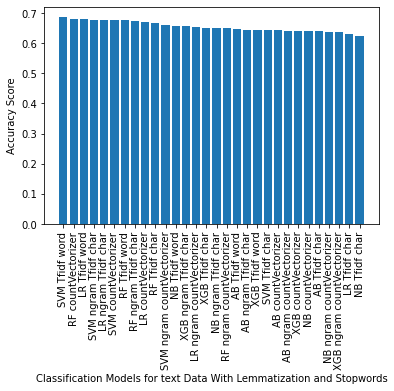

In [ ]:
import matplotlib.pyplot as plt
!matplotlib inline

x_metrics_lemmet = []
y_metrics_lemmet = []

for i in metrics:
  x_metrics_lemmet.append(i[0])
  y_metrics_lemmet.append(i[1])


plt.xlabel("Classification Models for text Data With Lemmatization and Stopwords")
plt.ylabel("Accuracy Score")
# plt.plot(x_metrics_lemmet, y_metrics_lemmet)
plt.bar(x_metrics_lemmet, y_metrics_lemmet)
plt.xticks(x_metrics_lemmet, rotation='vertical')
plt.show()

#Accuracy Measures of Models with and without (Lemmatization and Stopwords)

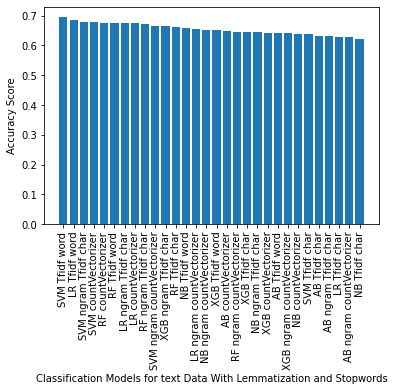

In [ ]:
plt.xlabel("Classification Models for text Data With Lemmatization and Stopwords")
plt.ylabel("Accuracy Score")
# plt.plot(x_metrics, y_metrics)
plt.bar(x_metrics, y_metrics)
plt.xticks(x_metrics, rotation='vertical')
plt.show()

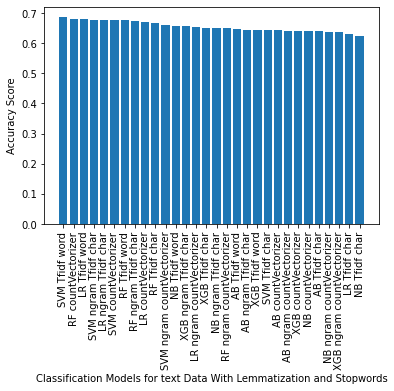

In [ ]:
plt.xlabel("Classification Models for text Data With Lemmatization and Stopwords")
plt.ylabel("Accuracy Score")
# plt.plot(x_metrics_lemmet, y_metrics_lemmet)
plt.bar(x_metrics_lemmet, y_metrics_lemmet)
plt.xticks(x_metrics_lemmet, rotation='vertical')
plt.show()